### importing essential libraries

In [1]:
import pickle
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

### loading data

In [2]:
data_train = pd.read_csv('train_FD001.txt',sep=" ")
data_train.drop(['Unnamed: 26','Unnamed: 27'],axis = 1, inplace = True)

In [3]:
index_names = ['engine', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
col_names = index_names + setting_names + sensor_names

In [4]:
data_train.columns = col_names

In [5]:
data_train.describe()

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
count,20630.000000,20630.000000,20630.000000,20630.000000,20630.0,2.063000e+04,20630.000000,20630.000000,20630.000000,2.063000e+04,...,20630.000000,20630.000000,20630.000000,20630.000000,2.063000e+04,20630.000000,20630.0,20630.0,20630.000000,20630.000000
mean,51.509016,108.813088,-0.000009,0.000002,100.0,5.186700e+02,642.680975,1590.523159,1408.934186,1.462000e+01,...,521.413458,2388.096156,8143.752971,8.442147,3.000000e-02,393.210713,2388.0,100.0,38.816259,23.289699
std,29.226226,68.878570,0.002187,0.000293,0.0,6.537152e-11,0.500029,6.131295,9.000636,3.394700e-12,...,0.737569,0.071919,19.076605,0.037506,1.556432e-14,1.548778,0.0,0.0,0.180743,0.108250
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.330000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.242500,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,-0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438950,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.557500,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [6]:
data_train.head()

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669


### data preprocessing

In [7]:
# here we are finding maximum life for each engine

In [8]:
data_train_RUL = data_train.groupby(['engine']).agg({'cycle':'max'})
data_train_RUL.rename(columns={'cycle':'life'},inplace=True)
data_train_RUL.head()
print(data_train_RUL.shape)

(100, 1)


In [9]:
data_train=data_train.merge(data_train_RUL,how='left',on=['engine'])

In [10]:
data_train.shape

(20630, 27)

In [11]:
# here we are finding remaining useful life for each record by subracting engine life cycles by current cycles

In [12]:
data_train['RUL']=data_train['life']-data_train['cycle']
data_train.drop(['life'],axis=1,inplace=True)

In [13]:
data_train.shape

(20630, 27)

In [14]:
# this is function made by for simple data analysis

In [15]:
def meta_data(data):
    total = data.isnull().sum()
    percent = (total/len(data))*100
    datatype = data.dtypes
    unique = data.nunique()
    
    return pd.concat([total,percent,datatype,unique],axis = 1, keys = ['total_missing_values','percent','datatype','unique'])

In [16]:
meta_data(data_train)

,total_missing_values,percent,datatype,unique
engine,0,0.0,int64,100
cycle,0,0.0,int64,362
setting_1,0,0.0,float64,158
setting_2,0,0.0,float64,13
setting_3,0,0.0,float64,1
(Fan inlet temperature) (◦R),0,0.0,float64,1
(LPC outlet temperature) (◦R),0,0.0,float64,310
(HPC outlet temperature) (◦R),0,0.0,float64,3012
(LPT outlet temperature) (◦R),0,0.0,float64,4051
(Fan inlet Pressure) (psia),0,0.0,float64,1


In [17]:
# dividing dataset into features and target

In [18]:
x = data_train.drop('RUL',axis = 1)
y = data_train['RUL']

In [19]:
x.shape,y.shape

((20630, 26), (20630,))

In [20]:
# this class was created by me while doing this project
# it helps a lot while feature selection
# you can save it as a module and import it wherever you want to make feature selection easier
# this class is used for feature selection thus dropping constant features, and features with greater correlation with eachother
# also the features with very less correlation with output

In [21]:
class Feature_Selection:
    
    def __init__(self,X,y,drop = None):
        
        import pandas as pd
        import matplotlib.pyplot as plt
        import seaborn as sns
        
        self.X = X
        self.y = y
        self.drop = drop
        # self.dataset = pd.concat([X, y], axis=1)
        
        
        
    @property
    def dataset(self):
        
        return pd.concat([self.X,self.y],axis = 1)
        
        
        
    def corr_matrix(self):
        
        return self.dataset.corr()
        
        
        
    def corr_matrix_visual(self):
        
        plt.figure(figsize = (12,10))
        cor = self.dataset.corr()
        sns.heatmap(cor, annot = True , cmap = 'coolwarm') 
        # plt.cm. then you can any of the color in cmap
         
    
    
    def const_features_selection(self,thresh):
    
        from sklearn.feature_selection import VarianceThreshold
        var_thres = VarianceThreshold(threshold = thresh)
        var_thres.fit(self.X)
        print(var_thres.get_support())
        print('')
        print(f"Total Variable Features = {len(list(filter(lambda num : num == True ,var_thres.get_support().tolist() )))}")
        print('')
        print(f"Total Constant Features = {len(list(filter(lambda num : num == False ,var_thres.get_support().tolist() )))}")
        print('')
        const_cols = [column for column in self.X.columns if column not in self.X.columns[var_thres.get_support()]]
        print(f"Constant Columns = {const_cols}")
        if (self.drop == 'y') or (self.drop == 'Y'):
            self.X.drop(const_cols,axis = 1, inplace = True)
            print("Features Dropped!")
        else:
            while True:
                a = input('Do you want to drop the constant features? (y/n) ')
                if (a == 'y') or (a == 'Y'):
                    self.X.drop(const_cols,axis = 1, inplace = True)
                    print("Features Dropped!")
                    break 
                elif (a == 'n') or (a == 'N'):
                    print("Features Not Dropped!")
                    break
                    
                    
                    
    def features_corr_filter(self,thresh):
        
        col_corr = set()
        corr_matrix = self.X.corr()
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i,j]) > thresh:
                    colname = corr_matrix.columns[i]
                    col_corr.add(colname)
        print(col_corr)
        if (self.drop == 'y') or (self.drop == 'Y'):
            self.X.drop(col_corr,axis = 1, inplace = True)
            print("Features Dropped!")
        else:
            while True:
                a = input('Do you want to drop the feature with correlation above threshold? (y/n) ')
                if (a == 'y') or (a == 'Y'):
                    self.X.drop(col_corr,axis = 1, inplace = True)
                    print("Features Dropped!")
                    break 
                elif (a == 'n') or (a == 'N'):
                    print("Features Not Dropped!")
                    break
                    
                    
                    
    def features_corr_with_output_filter(self,thresh):
        col_corr = set()
        corr_matrix = self.dataset.corr()

        for i in range(len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i,-1]) <= thresh:
                col_corr.add(corr_matrix.columns[i])
        print(col_corr)
        if (self.drop == 'y') or (self.drop == 'Y'):
            self.X.drop(col_corr,axis = 1, inplace = True)
            print("Features Dropped!")
        else:
            while True:
                a = input('Do you want to drop the feature with correlation with output below threshold? (y/n) ')
                if (a == 'y') or (a == 'Y'):
                    self.X.drop(col_corr,axis = 1, inplace = True)
                    print("Features Dropped!")
                    break 
                elif (a == 'n') or (a == 'N'):
                    print("Features Not Dropped!")
                    break
                    
                    
                    
    def features_corr_visual_filter(self,thresh):
        
        plt.figure(figsize=(10,10))
        sns.set_style("whitegrid", {"axes.facecolor": ".0"})
        df = self.X.corr()
        mask = df.where((abs(df) >= thresh)).isna()
        plot_kws={"s": 1}
        sns.heatmap(df,
                    cmap='RdYlBu',
                    annot=True,
                    mask=mask,
                    linewidths=0.2, 
                    linecolor='lightgrey').set_facecolor('white')
        
        
        
    def features_corr_with_output_visual_filter(self,thresh):
        
        plt.figure(figsize=(10,10))
        sns.set_style("whitegrid", {"axes.facecolor": ".0"})
        df = self.dataset.corr()
        
        # where method in pandas replace the values not satisfying the condition with null values
        # isna method replace the null values with true bool
        mask = df.where((abs(df.iloc[:,-1:]) <= thresh)).isna()
    
        plot_kws={"s": 1}
        sns.heatmap(df,
                    cmap='RdYlBu',
                    annot=True,
                    mask=mask,
                    linewidths=0.2, 
                    linecolor='lightgrey').set_facecolor('white')
    

In [22]:
fs = Feature_Selection(x,y,'Y')

In [23]:
corr_matrix = fs.corr_matrix()

In [24]:
corr_matrix

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),RUL
engine,1.000000,0.078632,-0.017923,-0.006312,NaN,NaN,0.013991,0.012611,0.026041,NaN,...,0.044146,-0.059500,0.022438,NaN,0.013449,NaN,NaN,-0.020478,-0.016367,0.078862
cycle,0.078632,1.000000,-0.004551,0.016030,NaN,NaN,0.549840,0.543969,0.624557,NaN,...,0.477484,0.370326,0.588670,NaN,0.566978,NaN,NaN,-0.583555,-0.585888,-0.736219
setting_1,-0.017923,-0.004551,1.000000,0.011640,NaN,NaN,0.009004,-0.005653,0.009530,NaN,...,0.002302,-0.004474,0.007643,NaN,0.002587,NaN,NaN,-0.005692,-0.014541,-0.003180
setting_2,-0.006312,0.016030,0.011640,1.000000,NaN,NaN,0.007152,0.009059,0.014612,NaN,...,0.018087,-0.006329,0.014117,NaN,0.012229,NaN,NaN,-0.010465,-0.007767,-0.001867
setting_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(Fan inlet temperature) (◦R),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(LPC outlet temperature) (◦R),0.013991,0.549840,0.009004,0.007152,NaN,NaN,1.000000,0.602642,0.714938,NaN,...,0.661770,0.179743,0.675979,NaN,0.629875,NaN,NaN,-0.661805,-0.668022,-0.606448
(HPC outlet temperature) (◦R),0.012611,0.543969,-0.005653,0.009059,NaN,NaN,0.602642,1.000000,0.678421,NaN,...,0.600973,0.237136,0.639923,NaN,0.600021,NaN,NaN,-0.625961,-0.633915,-0.584533
(LPT outlet temperature) (◦R),0.026041,0.624557,0.009530,0.014612,NaN,NaN,0.714938,0.678421,1.000000,NaN,...,0.745147,0.190740,0.758454,NaN,0.703489,NaN,NaN,-0.748055,-0.745181,-0.678932
(Fan inlet Pressure) (psia),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


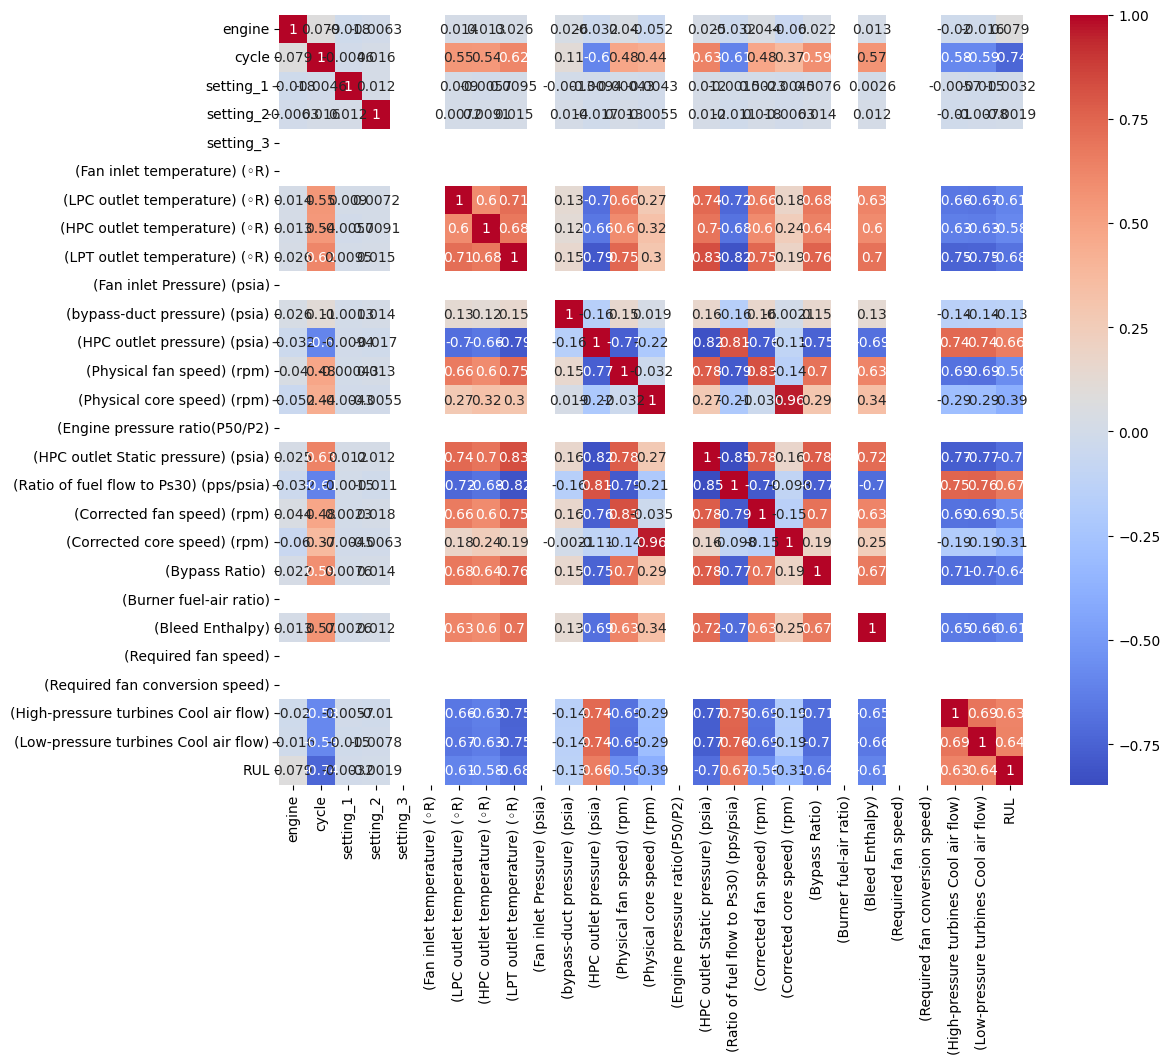

In [25]:
fs.corr_matrix_visual()

In [26]:
fs.const_features_selection(0.0001)

[ True  True False False False False  True  True  True False False  True
  True  True False  True  True  True  True  True False  True False False
  True  True]

Total Variable Features = 16

Total Constant Features = 10

Constant Columns = ['setting_1', 'setting_2', 'setting_3', '(Fan inlet temperature) (◦R)', '(Fan inlet Pressure) (psia)', '(bypass-duct pressure) (psia)', '(Engine pressure ratio(P50/P2)', '(Burner fuel-air ratio)', '(Required fan speed)', '(Required fan conversion speed)']
Features Dropped!


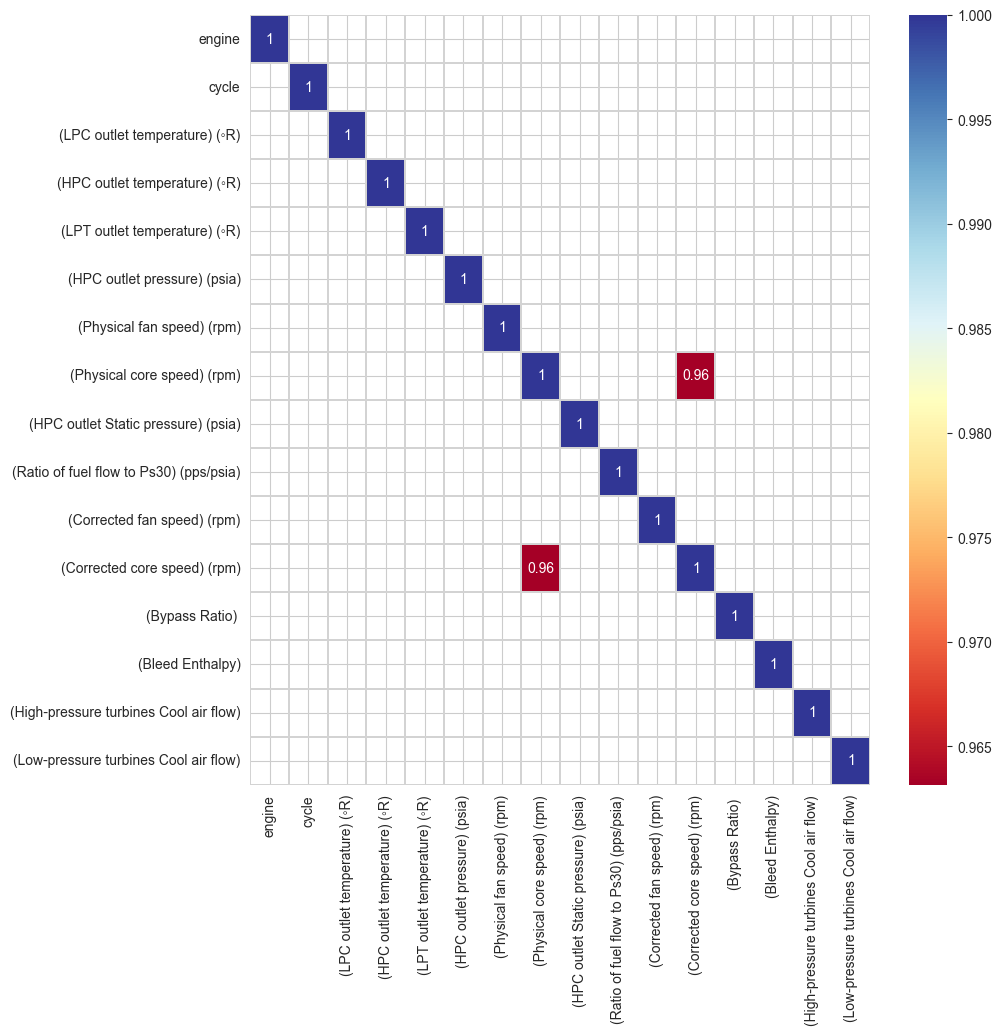

In [27]:
fs.features_corr_visual_filter(0.9)

In [28]:
fs.features_corr_filter(0.9)

{'(Corrected core speed) (rpm)'}
Features Dropped!


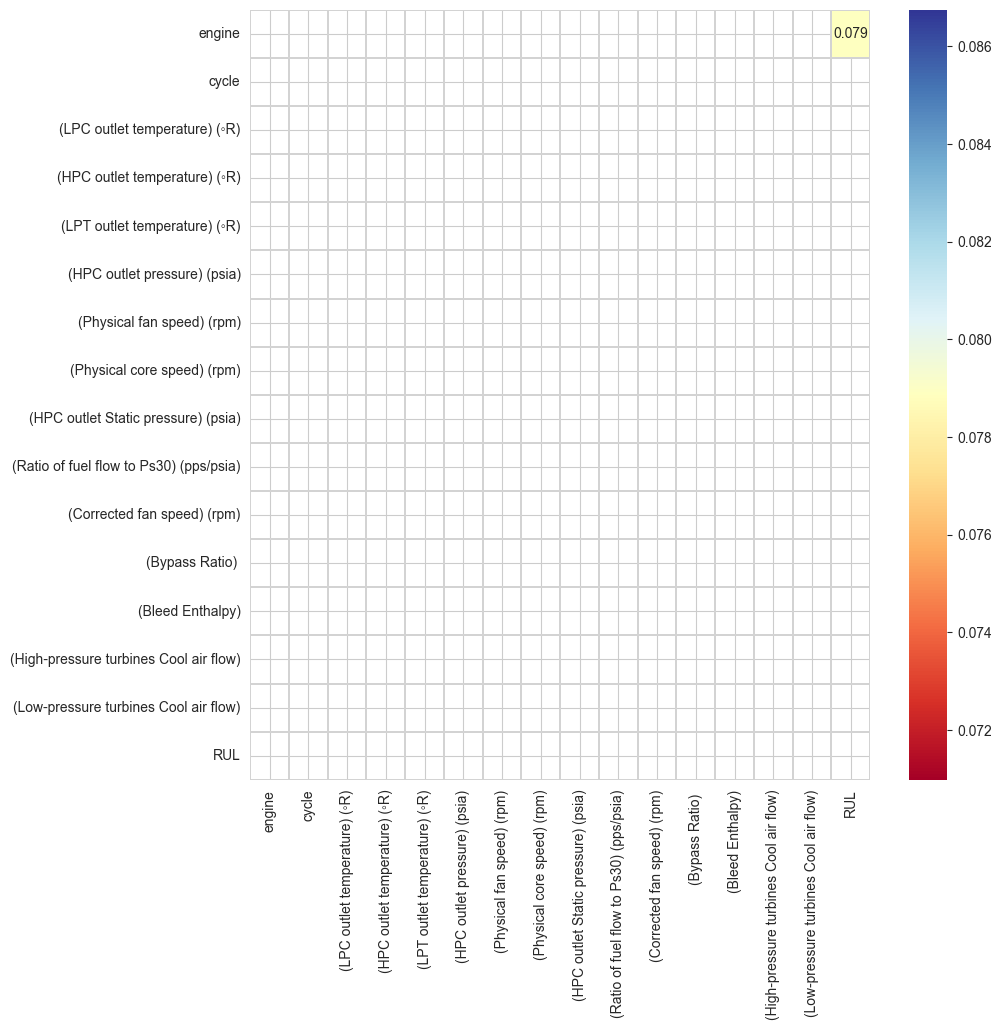

In [29]:
fs.features_corr_with_output_visual_filter(0.1)

In [30]:
fs.features_corr_with_output_filter(0.1)

{'engine'}
Features Dropped!


In [31]:
x.shape

(20630, 14)

In [32]:
x.columns

Index(['cycle', '(LPC outlet temperature) (◦R)',
       '(HPC outlet temperature) (◦R)', '(LPT outlet temperature) (◦R)',
       '(HPC outlet pressure) (psia)', '(Physical fan speed) (rpm)',
       '(Physical core speed) (rpm)', '(HPC outlet Static pressure) (psia)',
       '(Ratio of fuel flow to Ps30) (pps/psia)',
       '(Corrected fan speed) (rpm)', '(Bypass Ratio) ', '(Bleed Enthalpy)',
       '(High-pressure turbines Cool air flow)',
       '(Low-pressure turbines Cool air flow)'],
      dtype='object')

Yes, when you pass a DataFrame as an argument to a class, and that DataFrame is assigned as an instance variable within the class, any modifications made to that DataFrame instance variable will affect the original DataFrame passed as an argument. This behavior is due to the mutable nature of DataFrames in Python.

In [33]:
x.isnull().sum()

cycle                                      0
(LPC outlet temperature) (◦R)              0
(HPC outlet temperature) (◦R)              0
(LPT outlet temperature) (◦R)              0
(HPC outlet pressure) (psia)               0
(Physical fan speed) (rpm)                 0
(Physical core speed) (rpm)                0
(HPC outlet Static pressure) (psia)        0
(Ratio of fuel flow to Ps30) (pps/psia)    0
(Corrected fan speed) (rpm)                0
(Bypass Ratio)                             0
(Bleed Enthalpy)                           0
(High-pressure turbines Cool air flow)     0
(Low-pressure turbines Cool air flow)      0
dtype: int64

In [34]:
y.unique()

array([190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178,
       177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165,
       164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152,
       151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139,
       138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126,
       125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113,
       112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100,
        99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,  87,
        86,  85,  84,  83,  82,  81,  80,  79,  78,  77,  76,  75,  74,
        73,  72,  71,  70,  69,  68,  67,  66,  65,  64,  63,  62,  61,
        60,  59,  58,  57,  56,  55,  54,  53,  52,  51,  50,  49,  48,
        47,  46,  45,  44,  43,  42,  41,  40,  39,  38,  37,  36,  35,
        34,  33,  32,  31,  30,  29,  28,  27,  26,  25,  24,  23,  22,
        21,  20,  19,  18,  17,  16,  15,  14,  13,  12,  11,  1

In [35]:
list(x)

['cycle',
 '(LPC outlet temperature) (◦R)',
 '(HPC outlet temperature) (◦R)',
 '(LPT outlet temperature) (◦R)',
 '(HPC outlet pressure) (psia)',
 '(Physical fan speed) (rpm)',
 '(Physical core speed) (rpm)',
 '(HPC outlet Static pressure) (psia)',
 '(Ratio of fuel flow to Ps30) (pps/psia)',
 '(Corrected fan speed) (rpm)',
 '(Bypass Ratio) ',
 '(Bleed Enthalpy)',
 '(High-pressure turbines Cool air flow)',
 '(Low-pressure turbines Cool air flow)']

In [36]:
x.shape

(20630, 14)

In [37]:
y.shape

(20630,)

In [38]:
# scaling data

In [39]:
x.head()

,cycle,(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236
1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442
2,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739
3,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044
4,6,642.10,1584.47,1398.37,554.67,2388.02,9049.68,47.16,521.68,2388.03,8.4108,391,38.98,23.3669


In [40]:
cols = x.columns

In [41]:
scalar = MinMaxScaler()

In [42]:
x = scalar.fit_transform(x)

In [43]:
x = pd.DataFrame(x,columns =cols )

In [44]:
x

,cycle,(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,0.002770,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.411312,0.333333,0.666667,0.731014
1,0.005540,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.357445,0.166667,0.627907,0.621375
2,0.008310,0.343373,0.256159,0.331195,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.166603,0.333333,0.573643,0.662386
3,0.011080,0.349398,0.257467,0.404625,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.402078,0.416667,0.589147,0.704502
4,0.013850,0.268072,0.292784,0.272113,0.776167,0.181818,0.125415,0.184524,0.637527,0.220588,0.330512,0.250000,0.651163,0.652720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20625,0.540166,0.686747,0.587312,0.782917,0.254428,0.439394,0.196491,0.726190,0.170576,0.558824,0.656791,0.750000,0.271318,0.109500
20626,0.542936,0.701807,0.729453,0.866475,0.162641,0.500000,0.194651,0.708333,0.211087,0.500000,0.727203,0.583333,0.124031,0.366197
20627,0.545706,0.665663,0.684979,0.775321,0.175523,0.515152,0.198196,0.738095,0.281450,0.529412,0.922278,0.833333,0.232558,0.053991
20628,0.548476,0.608434,0.746021,0.747468,0.133655,0.530303,0.233285,0.916667,0.208955,0.514706,0.823394,0.583333,0.116279,0.234466


In [45]:
# here we are dividing data into train and test sets

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [47]:
x_train.shape

(16504, 14)

In [48]:
x_test.shape

(4126, 14)

In [49]:
y_train.shape

(16504,)

In [50]:
y_test.shape

(4126,)

### model training

In [51]:
model = LinearRegression()

In [52]:
model.fit(x_train,y_train)

LinearRegression()

In [53]:
model.coef_

array([-144.73043243,  -20.31960808,  -13.47800637,  -31.5668131 ,
         26.08115693,  -10.6363044 ,  -59.73246347,  -42.29972458,
         25.06132426,  -12.53980046,  -21.7802174 ,   -9.57575101,
         12.02638986,   15.00160992])

In [54]:
model.intercept_

186.43772047769505

### model evaluation

In [55]:
model.score(x_train,y_train)

0.6555597050881974

In [56]:
model.score(x_test,y_test)

0.653144610434474

### saving model

In [57]:
pickle.dump(model, open('./model.p', 'wb'))